In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import erf

In [3]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

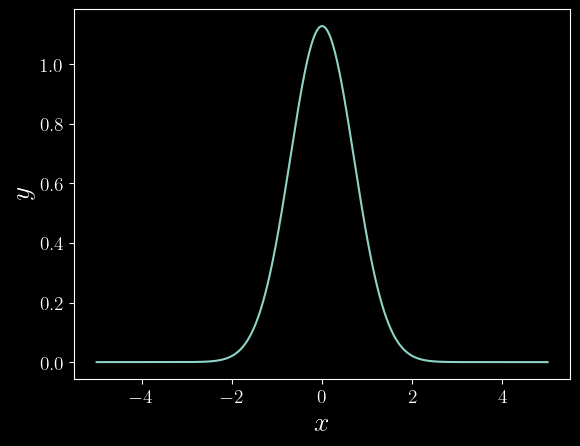

In [12]:
xvals = np.linspace(-5, 5, num=1000)
yvals = 2 / np.sqrt(np.pi) * np.exp(-xvals**2)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals)

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("gaussian.pdf", bbox_inches="tight", transparent=True)

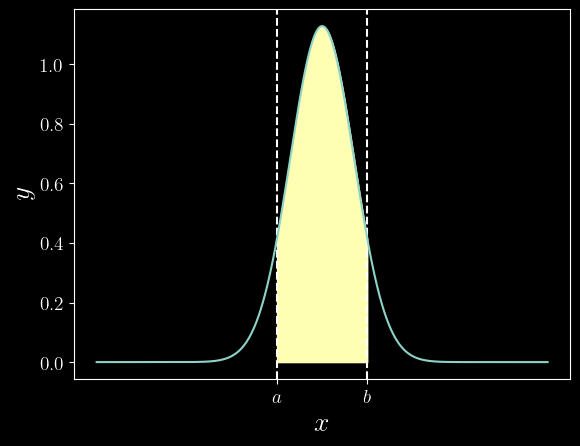

In [13]:
xvals = np.linspace(-5, 5, num=1000)
yvals = 2 / np.sqrt(np.pi) * np.exp(-xvals**2)

fig = plt.figure()
ax = plt.gca()
ax.axvline(x=-1, color="w", linestyle="--")
ax.axvline(x=1, color="w", linestyle="--")

ax.plot(xvals, yvals)

x2 = np.linspace(-1, 1, num=1000)
y2 = 2 / np.sqrt(np.pi) * np.exp(-x2**2)
ax.fill_between(x2, y2, color="C1")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.set_xticks([-1, 1], ["$a$", "$b$"])
ax.tick_params(axis="both", labelsize=14)

fig.savefig("gaussian_area.pdf", bbox_inches="tight", transparent=True)

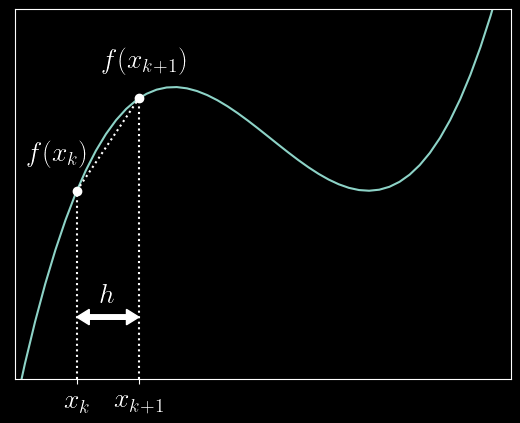

In [77]:
a0 = 4
a1 = -3.2
a2 = -0.7
a3 = 7

def f(x):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

xvals = np.linspace(-1, 1)
yvals = f(xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals)

a = -0.75
b = -0.5
fa = f(a)
fb = f(b)

da = 0.05
ax.plot([a, a], [0, fa], linestyle=":", color="w")
ax.plot([b, b], [0, fb], linestyle=":", color="w")
ax.plot([a, b], [fa, fb], linestyle=":", color="w", marker="o")
ax.text(a - 0.2, fa + 0.5, "$f(x_k)$", color="w", fontsize=20)
ax.text(b - 0.15, fb + 0.5, "$f(x_{k+1})$", color="w", fontsize=20)
ax.arrow(a + da, 1, b - a - da, 0, length_includes_head=True, width=0.07, head_width=0.25, head_length=0.05, color="w")
ax.arrow(b - da, 1, a - b + da, 0, length_includes_head=True, width=0.07, head_width=0.25, head_length=0.05, color="w")
ax.text((a + b) / 2 - 0.03, 1.25, "$h$", color="w", fontsize=20)

ax.set_xlim((-1, 1))
ax.set_ylim((0, 6))
ax.set_xticks([a, b], ["$x_k$", r"$x_{k+1}$"])
ax.set_yticks([])
ax.tick_params(axis="both", labelsize=20)

fig.savefig("trap.pdf", bbox_inches="tight", transparent=True)

In [93]:
def integrand(x):
    om = 0.30966
    ol = 1 - om
    return 1.0 / np.sqrt(om * (1 + x)**3 + ol)

In [81]:
from astropy.cosmology import Planck18
print(Planck18.Om0)

0.30966


In [91]:
from astropy import units, constants
print((constants.c / Planck18.H0).to("m"))

1.367222682161975e+26 m


In [92]:
from astropy import units, constants
print((constants.c / Planck18.H0).to("Mpc"))

4430.866952409105 Mpc


In [118]:
N = 10000
a = 0
b = 1
h = (b - a) / N

s = (integrand(a) + integrand(b)) / 2.0
for k in range(1, N):
    s += integrand(a + k * h)

DH = 4430.87  # Mpc
result = s * h * DH
print("result: ", result)

result:  3398.720439647963


In [100]:
Planck18.comoving_distance(1)

<Quantity 3395.63447115 Mpc>

In [101]:
def integrand2(x):
    return np.exp(-x**2)

In [116]:
N = 1000
a = 0
b = 1
h = (b - a) / N

s = (integrand2(a) + integrand2(b)) / 2.0
for k in range(1, N):
    s += integrand2(a + k * h)

result = s * h * 2 / np.sqrt(np.pi)
print("result: ", result)
print("scipy: ", erf(b))

result:  0.8427007237651292
scipy:  0.8427007929497148
